In [109]:
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd  
import seaborn as sn

In [110]:
df = pd.read_csv("3_dataset.csv")

removing the id column to reduce colinearity

In [111]:
df_required=df.drop(["id"],axis=1, inplace=True)

In [112]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,diagnosis
0,50,2,168,62,110,80,1,1,0,0,1,0,2
1,55,1,156,85,140,90,3,1,0,0,1,1,3
2,51,1,165,64,130,70,3,1,0,0,0,1,2
3,48,2,169,82,150,100,1,1,0,0,1,1,3
4,47,1,156,56,100,60,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68583,52,2,168,76,120,80,1,1,1,0,1,0,2
68584,61,1,158,126,140,90,2,2,0,0,1,1,3
68585,52,2,183,105,180,90,3,1,0,1,0,1,3
68586,61,1,163,72,135,80,1,2,0,0,0,1,2


In [113]:
# from scipy.stats import zscore
# df["Zscore_SP"]=zscore(df.diagnosis)
# df[(df.Zscore_SP>3.0)|(df.Zscore_SP<-3.0)]
# df

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df["age"])

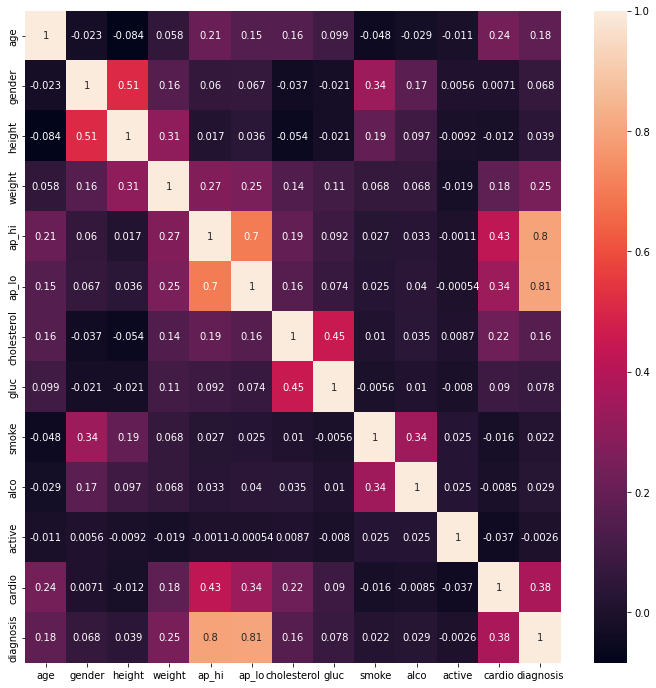

In [115]:
plt.figure(figsize=(12,12))
sn.heatmap(df.corr(), annot= True)


colinearity betwween ap_hi,ap_lo and diagnosis is high, also colineariity between ap_hi and lo is high, however there is nothing we can do about it, we cant delete them as they are essential for our prediction model

In [116]:
X =  df.drop(columns="diagnosis",axis=1)
Y =  df["diagnosis"]
print(X)

       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       50       2     168      62    110     80            1     1      0   
1       55       1     156      85    140     90            3     1      0   
2       51       1     165      64    130     70            3     1      0   
3       48       2     169      82    150    100            1     1      0   
4       47       1     156      56    100     60            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
68583   52       2     168      76    120     80            1     1      1   
68584   61       1     158     126    140     90            2     2      0   
68585   52       2     183     105    180     90            3     1      0   
68586   61       1     163      72    135     80            1     2      0   
68587   56       1     170      72    120     80            2     1      0   

       alco  active  cardio  
0         0       1       0  
1  

In [117]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.15, random_state=0)  

In [123]:
from sklearn.linear_model import LinearRegression  
reg= LinearRegression()  
reg.fit(X_train, Y_train)  

TypeError: ignored

In [119]:
print('Train Score: ', reg.score(X_train, Y_train))  
print('Test Score: ', reg.score(X_test, Y_test))  

Train Score:  0.7561390486061192
Test Score:  0.7570067973169438


In [121]:
# input_data=(43,1,156,60,80,60,1,1,0,0,1,0)
# input_data_as_numpy_array= np.asarray(input_data)
# import_data_reshaped = input_data_as_numpy_array.reshape(1,12) 
# prediction= reg.predict(import_data_reshaped)
# print(prediction)

[0.66681512]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
